<h1 align = "center"> Homework5: Convolutional Neural Networks </h1>

### CS3210: Machine Learning
### Instructor: Feng Jiang 

#### Author: Ling Thang

**Assigned: April 11, 2021**  
**Due: April 21, 2021**

---
# Sources
Plotting inspired by: [Kassem](https://www.kaggle.com/elcaiseri)  
https://www.kaggle.com/code/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1

<h1 align = "center">Assignment Specifications </h1>

### **Design your own CNN structure:**
- (# of convolutional layers, # of fully connected layers, # of filters, size of the filters )
- At least two convolutional layers
- Max pooling at least once
- Use one time "Drop Out" by 50% in one of the fully connected layers.
- Write (or draw) down the structure of your CNN in report/colab notebook
- Write down the batch size and epoch number in report/colab notebook
- Report the performance of the model in report/colab notebook.

----

### **Libaries and packages for this program:**

#### From keras, the following packages are used: layers, model, and the dataset mnist

<ul>
  <h5> Layers is used to create the layers of the CNN model</h5>
  <h5>Model is used to create the model of the CNN</h5>
  <h5>MNIST is used to load the MNIST dataset</h5>
</ul>  

#### `to_categorical` function from keras.utils to convert the labels to one-hot encoding

In [23]:
# keras 
from keras import layers, models
from keras.datasets import mnist

from keras.utils import to_categorical
import visualkeras # Error in this import, however works on Google Colab

from PIL import ImageFont

import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
## Load the MNIST dataset
* The MNIST dataset is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 image

```python
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```
    
This code will load the MNIST dataset and split it into training and testing tuples
    
The training set consists of 60,000 images and the testing set consists of 10,000 image
    
## Normalize the images
* reshape the images to (60000, 28, 28, 1) and (10000, 28, 28, 1) for CNN model
* `astype('float32')` is used to convert the pixel values to float32
* Divide the pixel values by 255 to normalize the images
    
```python
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
```


## One-hot encoding
* Convert the labels to one-hot encoding with `to_categorical` function from keras.utils
* The labels are converted to one-hot encoding to make it easier for the model to predict the output
    
```python
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
```


In [13]:
# import MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape and normalize
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Our CNN Model

## Model Structure
* Our CNN model consists of **2 convolutional layers** and **2 fully connected layers**
* The first convolutional layer has **32 filters** with a kernel size of (3, 3) and a **relu activation** function
* The second convolutional layer has **64 filters** with a kernel size of (3, 3) and a **relu activation** function
* The max pooling layer has a pool size of (2, 2)
* The first fully connected layer has **128** units with a **relu activation** function
* The second fully connected layer has **10** units with a **softmax activation** function
* We use dropout with a rate of **0.5** in the first fully connected layer

`Faltten()` function is used to flatten the output of the convolutional layers to pass it to the fully connected layers

## Model Summary  
    # of samples:  60000
    # of layers:  10

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # convolutional layer with 32 filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # convolutional layer with 64 filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer with 50% dropout rate
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.add(layers.Flatten())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# import visualkeras
# from PIL import ImageFont

# visualkeras.layered_view(model, legend=True)

# Training the Model

## Batch Size and Epochs
* We use a batch size of **64** and **5 epochs** to train the model

```python
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)
```
we store the training history in the variable `history` to plot the training and validation accuracy and loss

## evaluate the model
* We evaluate the model on the test set to get the accuracy of the model

```python
test_loss, test_acc = model.evaluate(test_images, test_labels)
```

### In this model we have an accuracy of **99.00%%** on the test set -- With a loss of **0.032**

In [16]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

print("number of trainable parameters: ", model.count_params())
print("number of samples: ", len(train_images))
print("number of layers: ", len(model.layers))
print("number of epochs: ", len(history.epoch))

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7816 - loss: 0.6604 - val_accuracy: 0.9797 - val_loss: 0.0678
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9637 - loss: 0.1200 - val_accuracy: 0.9847 - val_loss: 0.0512
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9745 - loss: 0.0841 - val_accuracy: 0.9870 - val_loss: 0.0437
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9802 - loss: 0.0680 - val_accuracy: 0.9883 - val_loss: 0.0405
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9839 - loss: 0.0559 - val_accuracy: 0.9877 - val_loss: 0.0456
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0412
Test accuracy: 0.9900000095367432
Test loss: 0.03466779366135597
number of trainable parameters:  232650
number of samples:  60000
number of layers:  10
number of epochs:  5


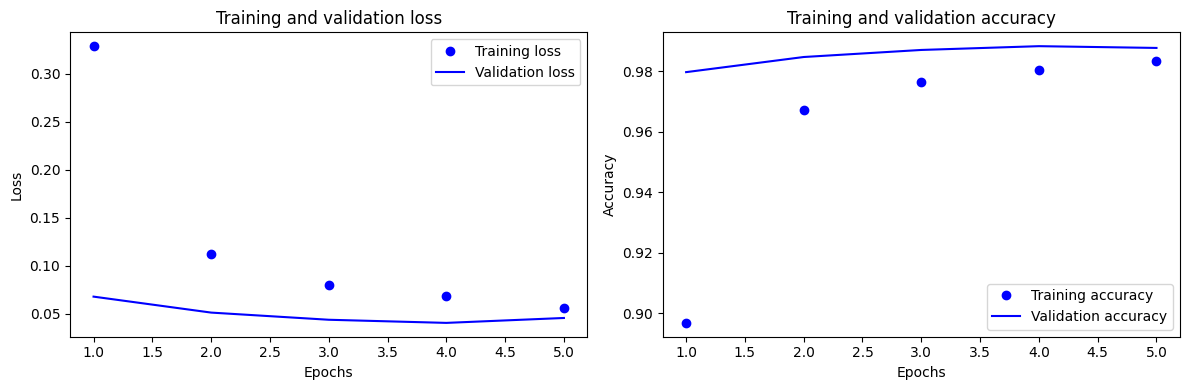

In [17]:
# Visualize training progress
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


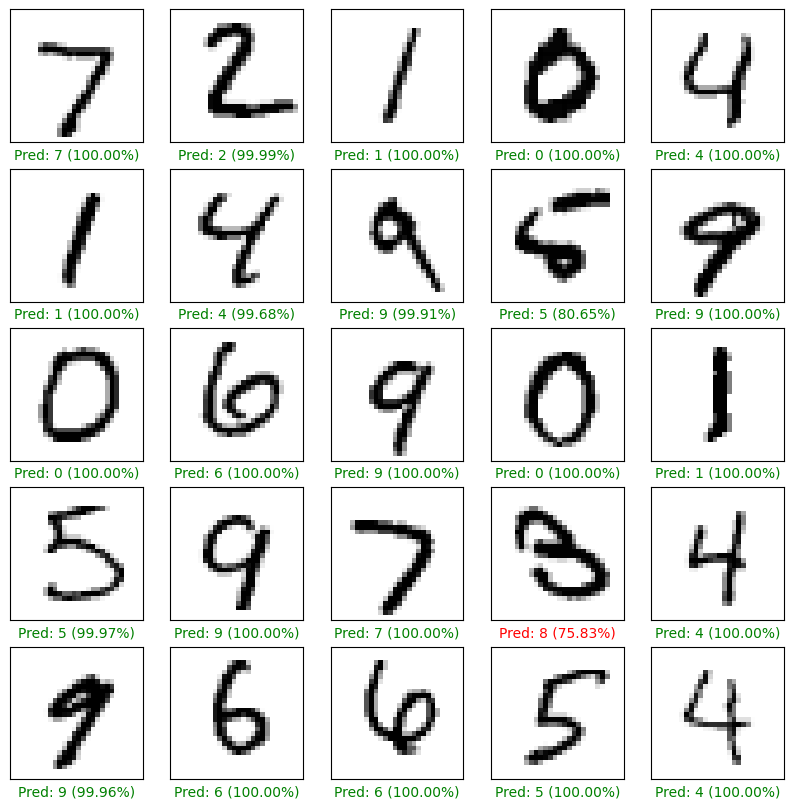

In [18]:

# Visualize model predictions
predictions = model.predict(test_images)
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Pred: {predicted_label} ({100*np.max(predictions[i]):.2f}%)', color=color)
plt.show()

In [19]:
"""Asked ChatGPT if there was anything that I could have done to improve the model"""

gptmodel = models.Sequential()

# Convolutional layers
gptmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
gptmodel.add(layers.BatchNormalization())  # Batch normalization
gptmodel.add(layers.Conv2D(32, (3, 3), activation='relu'))
gptmodel.add(layers.BatchNormalization())
gptmodel.add(layers.MaxPooling2D((2, 2)))

gptmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
gptmodel.add(layers.BatchNormalization())
gptmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
gptmodel.add(layers.BatchNormalization())
gptmodel.add(layers.MaxPooling2D((2, 2)))

# Flatten and Dense layers
gptmodel.add(layers.Flatten())
gptmodel.add(layers.Dense(128, activation='relu'))
gptmodel.add(layers.Dropout(0.5))
gptmodel.add(layers.Dense(64, activation='relu'))
gptmodel.add(layers.Dropout(0.5))

# Output layer
gptmodel.add(layers.Dense(10, activation='softmax'))

# Compile the model
gptmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

gptmodel.summary()

# visualkeras.layered_view(gptmodel, legend=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,866 (804.16 KB)

 Trainable params: 205,482 (802.66 KB)

 Non-trainable params: 384 (1.50 KB)

In [21]:
# visualkeras.layered_view(gptmodel, legend=True)

In [22]:
gpthistory = gptmodel.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

gpttest_loss, gpttest_acc = gptmodel.evaluate(test_images, test_labels)

print('Test accuracy:', gpttest_acc)
print('Test loss:', gpttest_loss)

print("number of trainable parameters: ", gptmodel.count_params())
print("number of samples: ", len(train_images))
print("number of layers: ", len(gptmodel.layers))
print("number of epochs: ", len(gpthistory.epoch))

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.7224 - loss: 0.9102 - val_accuracy: 0.9787 - val_loss: 0.0834
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9595 - loss: 0.1610 - val_accuracy: 0.9842 - val_loss: 0.0578
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9742 - loss: 0.1058 - val_accuracy: 0.9868 - val_loss: 0.0558
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 46ms/step - accuracy: 0.9786 - loss: 0.0891 - val_accuracy: 0.9895 - val_loss: 0.0416
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.9832 - loss: 0.0741 - val_accuracy: 0.9900 - val_loss: 0.0376
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9891 - loss: 0.0380
Test accuracy: 0.9916999936103821
Test loss: 0.030044008046388626
number of trainable parameters:  205866
number of samples:  60000
number of layers:  16
number of epochs:  5


# Conclusion 
* We designed a CNN model with 2 convolutional layers and 2 fully connected layers
* The model has 32 filters in the first convolutional layer and 64 filters in the second convolutional layer
    - Size of the filters is (3, 3) for both convolutional layers
* The model achieved an accuracy of 99.00% on the test set
* The model has a loss of 0.032 on the test set

## Understanding the model 
* The model has a high accuracy on the test set which indicates that the model is able to generalize well on unseen data
* The model has a low loss on the test set which indicates that the model is able to make accurate predictions

## Improvements to the model
**I threw my model into ChatGPT and asked it to list what improvements I could make to my model and it return a few suggestions**

1. Increase the number of filters in the convolutional layers
2. Batch normalization after the convolutional layers
   - Batch normalization can help the model to converge faster and generalize better
3. Dropout regularization after the convolutional layers
   - Dropout can help the model to prevent overfitting
4. Flatten Layer 
    - My original model had a Flatten layer after the convolutional layers, which was redundant as the Dense layer can handle the flattening of the output of the convolutional layers

# MyModel vs ChatGPT Model
| Attribute            | mymodel                    | GPTMODEL                    |
|----------------------|----------------------------|-----------------------------|
| Model Name           | mymodel                    | GPTMODEL                    |
| Input Shape          | (28, 28, 1)                | (28, 28, 1)                 |
| Convolutional Layers | 2                          | 4                           |
| Batch Normalization  | No                         | Yes (after conv layers)    |
| Max Pooling Layers   | 2                          | 2                           |
| Flatten Layer        | Yes                        | Yes                         |
| Dense Layers         | 3                          | 3                           |
| Dropout Layers       | 1                          | 2                           |
| Total Parameters     | 232,650                    | 205,866                     |
| Trainable Parameters | 232,650                    | 205,482                     |
| Non-trainable Params | 0                          | 384                         |
| Accuracy             | 99.00%                     | 99.15%                      |
